In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análise Rápida dos Dados

In [ ]:
# Lendo o DF e assimilando a uma variavel para ficar mais fácil de manipular
dados = pd.read_csv('valorant_2022.csv')

In [ ]:
# Conhecendo um pouco sobre os dados do DF
dados.head(19)

,Player,Team,Nationality,Kill,Death,K/D,KAST,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank
0,Sacy,LOUD,Brazil,147,123,1.20,76%,"\t$60,000.00",Initiator,25.50,222,155,67,1
1,saadhak,LOUD,Argentina,150,143,1.05,76%,"\t$60,000.00",Initiator,22.50,222,155,67,1
2,pANcada,LOUD,Brazil,169,137,1.23,81%,"\t$60,000.00",Controller,36.75,222,155,67,1
3,Less,LOUD,Brazil,176,134,1.31,73%,"\t$60,000.00",Sentinel,26.50,222,155,67,1
4,aspas,LOUD,Brazil,166,158,1.05,71%,"\t$60,000.00",Duelist,26.25,222,155,67,1
5,yay,OPTC,United States,334,236,1.42,71%,"\t$30,000.00",Duelist,28.60,365,181,184,2
6,Marved,OPTC,Canada,240,252,0.95,73%,"\t$30,000.00",Controller,30.80,365,181,184,2
7,Victor,OPTC,United States,247,254,0.97,69%,"\t$30,000.00",Duelist,25.40,365,181,184,2
8,crashies,OPTC,United States,238,246,0.97,72%,"\t$30,000.00",Initiator,26.60,365,181,184,2
9,FNS,OPTC,Canada,188,247,0.76,67%,"\t$30,000.00",Sentinel,20.40,365,181,184,2


In [ ]:
# Tendo um "overview" estatístico para sabermos média, desvio padrão e dispersão dos dados
dados.describe().round(2)

,Kill,Death,K/D,HS %,Rounds Played,Rounds Win,Rounds Lose
count,40.00,40.00,40.00,40.00,40.00,40.00,40.0
mean,139.90,139.38,1.00,27.22,202.25,103.25,99.0
std,68.10,63.05,0.22,5.52,94.69,51.54,50.1
min,39.00,54.00,0.59,15.00,81.00,35.00,39.0
25%,84.25,82.25,0.86,23.75,136.00,63.75,63.5
50%,141.00,129.50,0.96,26.80,198.50,98.50,84.5
75%,180.50,175.25,1.11,30.45,244.75,147.50,126.0
max,334.00,254.00,1.52,38.80,365.00,181.00,184.0


In [ ]:
# Saber quantidade de linhas e colunas do DF
dados.shape

(40, 14)

In [ ]:
# Obter informações dos tipos de dados que vão ser trabalhados e se existe alguma
# info nula
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         40 non-null     object 
 1   Team           40 non-null     object 
 2   Nationality    40 non-null     object 
 3   Kill           40 non-null     int64  
 4   Death          40 non-null     int64  
 5   K/D            40 non-null     float64
 6   KAST           40 non-null     object 
 7   Prize          40 non-null     object 
 8   Role           40 non-null     object 
 9   HS %           40 non-null     float64
 10  Rounds Played  40 non-null     int64  
 11  Rounds Win     40 non-null     int64  
 12  Rounds Lose    40 non-null     int64  
 13  Rank           40 non-null     object 
dtypes: float64(2), int64(5), object(7)
memory usage: 4.5+ KB


In [ ]:
# Limpando a coluna de Premiação (Prize)
dados.Prize= dados['Prize'].str.replace('$','')
dados.Prize= dados['Prize'].str.replace('\t','')
dados.Prize= dados['Prize'].str.replace(',','')

# Mudando o tipo de dado (object/string -> float)
dados.Prize = dados['Prize'].astype(float)

# Limpando e mudando o tipo de dado da coluna KAST (object/string -> float)
dados.KAST = dados['KAST'].str.replace('%','')
dados.KAST = dados['KAST'].astype(float)

Perguntas para responder:

- Qual função, além de Duelista, teve mais Kills (abates)?

- Qual função tem mais impacto?

- Qual função tem a maior porcentagem de headshots?

Text(0.5, 1.0, 'Quantidade de Kills por função')

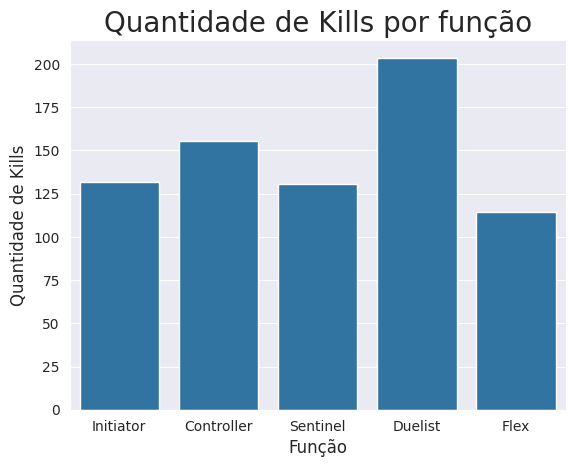

In [ ]:
# Questão 1
# Verificando todas as funções (role) existem no DF
dados.Role.unique()

# Plotando em um gráfico de barras com informações de Kills por Função
# Chegando na resposta de a segunda Role com mais abate são os Controladores
ax = sns.barplot(data = dados, y = 'Kill', x = 'Role', errorbar=None)
ax.set_xlabel('Função', fontsize = 12)
ax.set_ylabel('Quantidade de Kills', fontsize = 12)
ax.set_title('Quantidade de Kills por função', fontsize = 20)

Text(0.5, 1.0, 'Porcentagem de KAST (impacto) por Função')

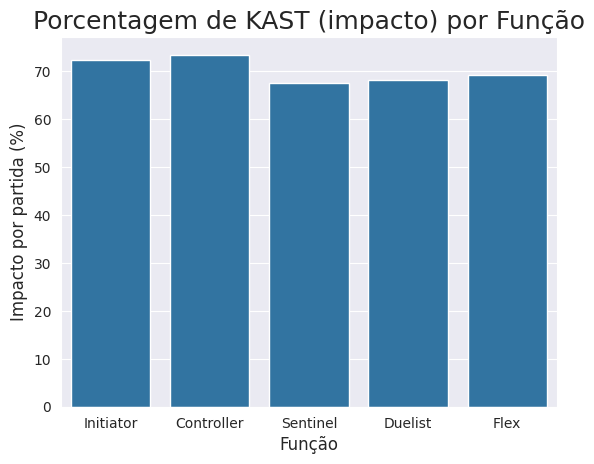

In [ ]:
# Questão 2

# Usando a mesma lógica do anterior, foi só substituir as colunas
# Assim, constatando uma leve superioridade da função de Controlador (desconsiderando uma possível margem de erro)
ax = sns.barplot(data = dados, y = 'KAST', x = 'Role', errorbar=None, )
ax.set_xlabel('Função', fontsize = 12)
ax.set_ylabel('Impacto por partida (%)', fontsize = 12)
ax.set_title('Porcentagem de KAST (impacto) por Função', fontsize = 18)

Text(0.5, 1.0, 'Porcentagem de Headshots por Função')

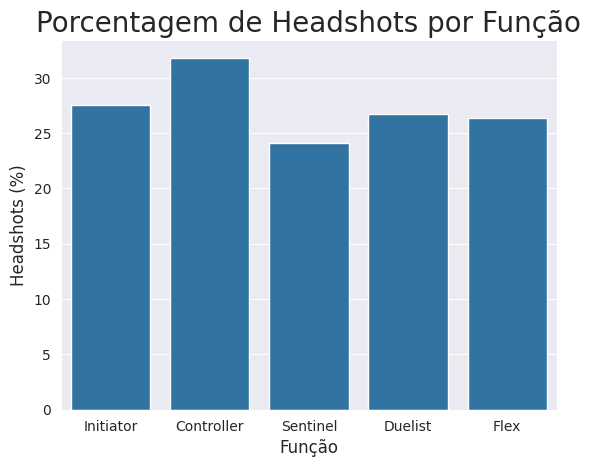

In [ ]:
# Questão 3

# Continuando a lógica aplicada, a função com mais taxas de HS também foram os controladores
# Podendo-se analiser uma incrível importância desta função dentro do game
ax = sns.barplot(data = dados, y = 'HS %', x = 'Role', errorbar=None, )
ax.set_xlabel('Função', fontsize = 12)
ax.set_ylabel('Headshots (%)', fontsize = 12)
ax.set_title('Porcentagem de Headshots por Função', fontsize = 20)

## Experimentos com Data Vizualization e Regressão de Dados





In [ ]:
# Os dados que mais se correlecionam para realizar uma análise "freestyle"
# O que mais tem possíveis combinações para análise é a coluna Kill
dados.corr(method='pearson', min_periods=1, numeric_only=True)

,Kill,Death,K/D,KAST,Prize,HS %,Rounds Played,Rounds Win,Rounds Lose
Kill,1.000000,0.905112,0.394385,0.235292,0.499280,0.106398,0.933555,0.888123,0.850645
Death,0.905112,1.000000,0.014958,0.076212,0.409425,0.070879,0.978085,0.889952,0.932919
K/D,0.394385,0.014958,1.000000,0.420265,0.306429,0.067249,0.138445,0.215021,0.040441
KAST,0.235292,0.076212,0.420265,1.000000,0.413104,-0.074585,0.221112,0.326731,0.081752
Prize,0.499280,0.409425,0.306429,0.413104,1.000000,0.050413,0.489715,0.734591,0.169792
HS %,0.106398,0.070879,0.067249,-0.074585,0.050413,1.000000,0.058541,0.102347,0.005347
Rounds Played,0.933555,0.978085,0.138445,0.221112,0.489715,0.058541,1.000000,0.933529,0.929507
Rounds Win,0.888123,0.889952,0.215021,0.326731,0.734591,0.102347,0.933529,1.000000,0.735503
Rounds Lose,0.850645,0.932919,0.040441,0.081752,0.169792,0.005347,0.929507,0.735503,1.000000


In [ ]:
# Vizualizo os 10 primeiros dados para ter mais noção
dados.head(10)

,Player,Team,Nationality,Kill,Death,K/D,KAST,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank
0,Sacy,LOUD,Brazil,147,123,1.20,76.0,60000.0,Initiator,25.50,222,155,67,1
1,saadhak,LOUD,Argentina,150,143,1.05,76.0,60000.0,Initiator,22.50,222,155,67,1
2,pANcada,LOUD,Brazil,169,137,1.23,81.0,60000.0,Controller,36.75,222,155,67,1
3,Less,LOUD,Brazil,176,134,1.31,73.0,60000.0,Sentinel,26.50,222,155,67,1
4,aspas,LOUD,Brazil,166,158,1.05,71.0,60000.0,Duelist,26.25,222,155,67,1
5,yay,OPTC,United States,334,236,1.42,71.0,30000.0,Duelist,28.60,365,181,184,2
6,Marved,OPTC,Canada,240,252,0.95,73.0,30000.0,Controller,30.80,365,181,184,2
7,Victor,OPTC,United States,247,254,0.97,69.0,30000.0,Duelist,25.40,365,181,184,2
8,crashies,OPTC,United States,238,246,0.97,72.0,30000.0,Initiator,26.60,365,181,184,2
9,FNS,OPTC,Canada,188,247,0.76,67.0,30000.0,Sentinel,20.40,365,181,184,2


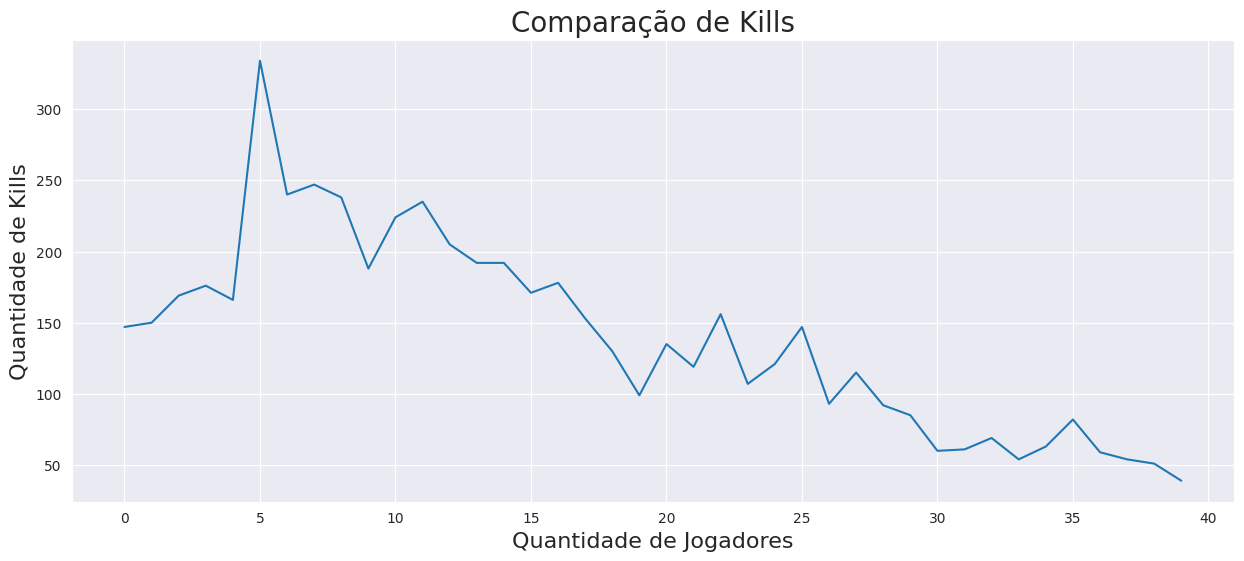

In [ ]:
# Plotando informações de kill dos jogadores do campeonato
# Tendência a queda com um pico muito acentuado, podendo ser uma possível relação
# a poucos jogos dos jogadores para poderem ter dados melhores ou por "falta" de habilidade
fig, ax = plt.subplots(figsize = (15, 6))

ax.set_title('Comparação de Kills', fontsize = 20)
ax.set_ylabel('Quantidade de Kills', fontsize = 16)
ax.set_xlabel('Quantidade de Jogadores', fontsize = 16)
ax = dados['Kill'].plot()


Text(0.5, 0, 'Quantidades de Kills')

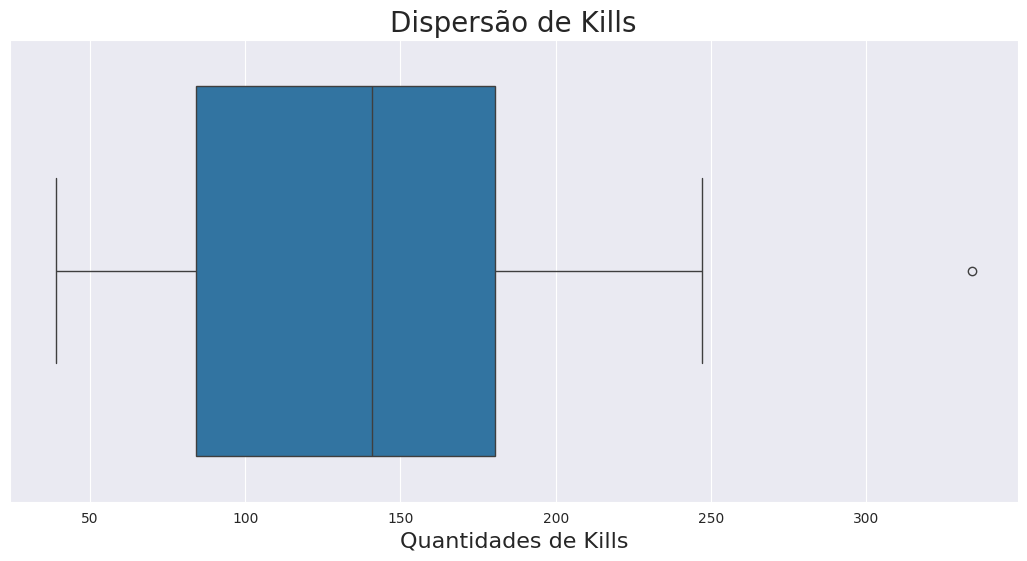

In [ ]:
"""
  Um boxplot para ver a dispersão das kills em todos os jogadores em um geral.Como
o gráfico anterior mostrou, muitos players tiveram menos que 150 kills no camp
deixando a mediana descentralizada.
  Porém, houve um Outliner de +300 kills, porém não desconsiderarei este único
dado.
"""
ax = sns.boxplot(data = dados['Kill'], orient = 'h')

ax.figure.set_size_inches(13, 6)
ax.set_title('Dispersão de Kills', fontsize = 20)
ax.set_xlabel('Quantidades de Kills', fontsize = 16)

Text(0, 0.5, 'Funções')

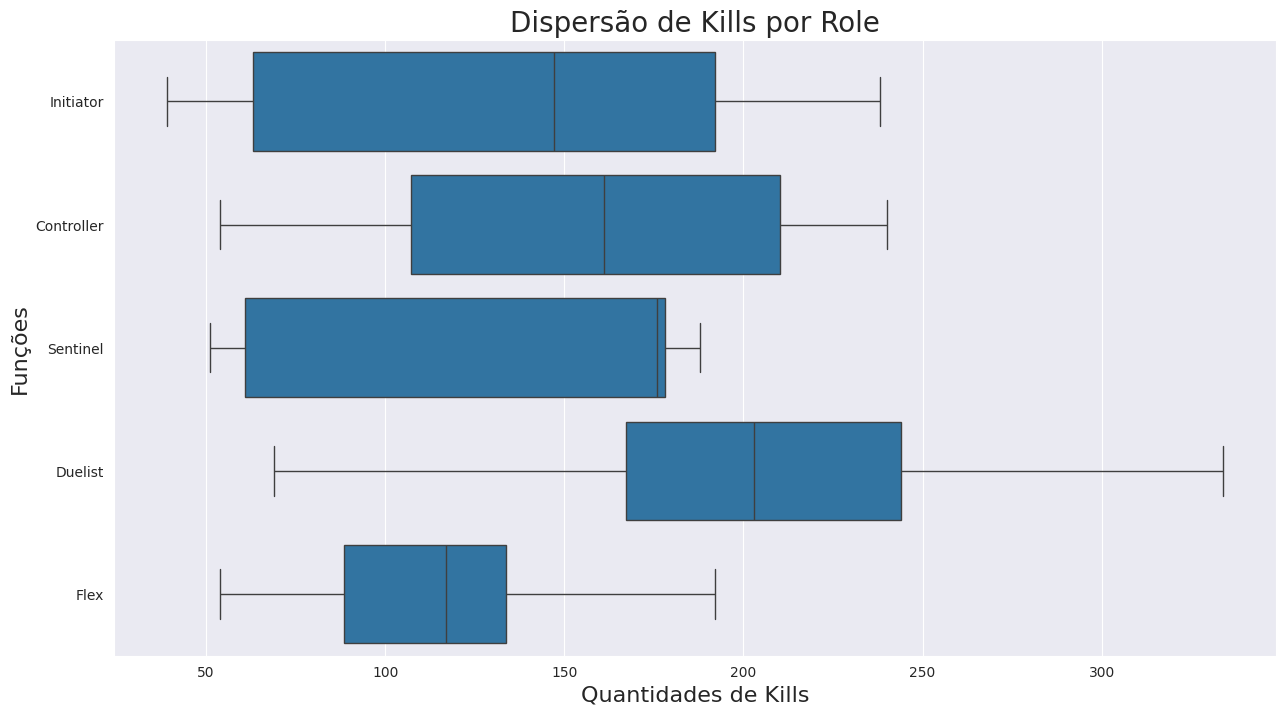

In [ ]:
"""
  Para ter uma visão mais específica de dentro do jogo, fiz um boxplot para comparar
as kills por função. Observei que os duelistas tem uma natural diferença no quesito kills,
explicando o fato de duelistas (em uma visão superficial) seja uma função impactante em rounds
clutch (decisivos) que precisem de uma vantagem numérica adquirido ao abater um inimigo.

  Iniciadores e Controladores se comportam de forma muito semenlhantes, com uma
diferença de uma maior dispersão por parte dos iniciadores.

  Os jogadores que são Flex (realizam multiplas funções) tendem a serem mais
limitados no quesito de quantidade de abates, mas no geral, possuem uma taxa de
HS boa e tem a 3ª melhor taxa de impacto nas partidas, podendo significar um possível
foco em organizar em completar o time em outros quesitos que não sejam a mira,
tendo como opções: Liderança, estratégia ou extração de 100% do uso de recursos (habilidades).

  Já os Sentinelas, ao que tudo indicam, possuem uma dispersão de dados bem peculiar,
além de outros dados serem bem decepcionates, são a função com menor impacto,
2ª no quesito de abates e possuem a menor taxa de HS. Consolidando uma possível
mudança de mais profissionais flex, já que de acordo com os dados, não é uma
função com muitos benefícios.
"""

ax = sns.boxplot(y='Role', x= 'Kill', data = dados, orient = 'h')

ax.figure.set_size_inches(15, 8)
ax.set_title('Dispersão de Kills por Role', fontsize = 20)
ax.set_xlabel('Quantidades de Kills', fontsize = 16)
ax.set_ylabel('Funções', fontsize = 16)

In [ ]:
"""
  Analisando os dados individuais dos Sentinelas do campeonato, verificou-se que
5 de 8 times da competição utilizaram um jogador fixo dessa Role, e que em um
overview, possuem 2 jogadores que tiveram desempenhos péssimos (comparado com os
outros jogadores do campeonato), podendo ter uma possível alteração nos resultados
dos sentinelas por conta deles.
"""
dados.query('Role == "Sentinel"')


,Player,Team,Nationality,Kill,Death,K/D,KAST,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank
3,Less,LOUD,Brazil,176,134,1.31,73.0,60000.0,Sentinel,26.50,222,155,67,1
9,FNS,OPTC,Canada,188,247,0.76,67.0,30000.0,Sentinel,20.40,365,181,184,2
16,ardiis,FPX,Latvia,178,166,1.07,71.0,16000.0,Sentinel,20.75,214,118,96,4
31,Jamppi,TL,Finland,61,75,0.81,64.0,8000.0,Sentinel,29.00,81,42,39,"7,8"
38,Tacolilla,LEV,Chile,51,68,0.75,63.0,8000.0,Sentinel,24.00,88,35,53,"7,8"


<ipython-input-72-558e536bc6ec>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Kill'])


Text(0.5, 0, 'Quantidade de Kills')

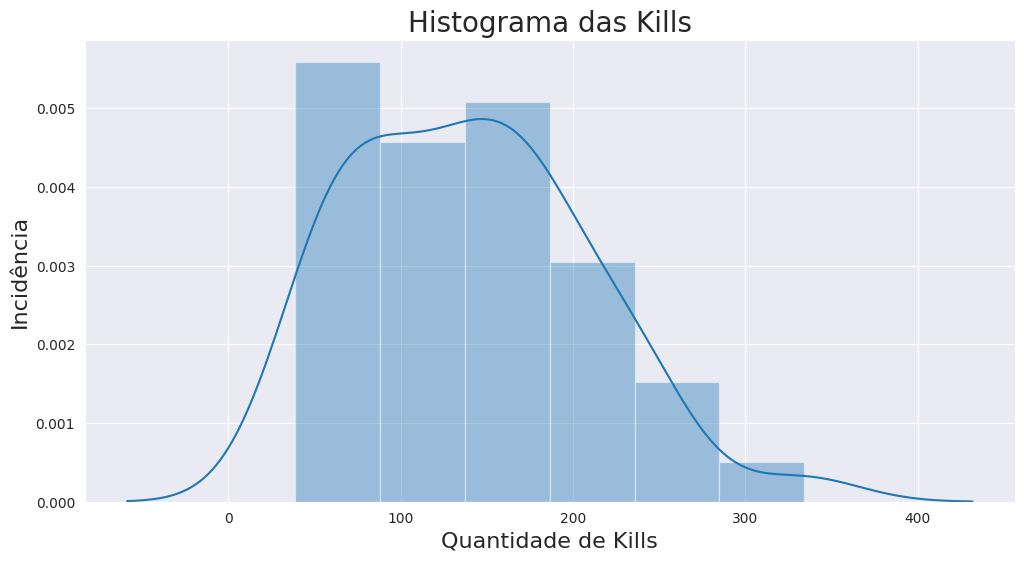

In [ ]:
# Neste Histograma, se assemelha a uma distribuição normal, porém possui muitas variações

sns.set_style("darkgrid")
ax = sns.distplot(dados['Kill'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma das Kills', fontsize=20)
ax.set_ylabel('Incidência', fontsize=16)
ax.set_xlabel('Quantidade de Kills', fontsize=16)

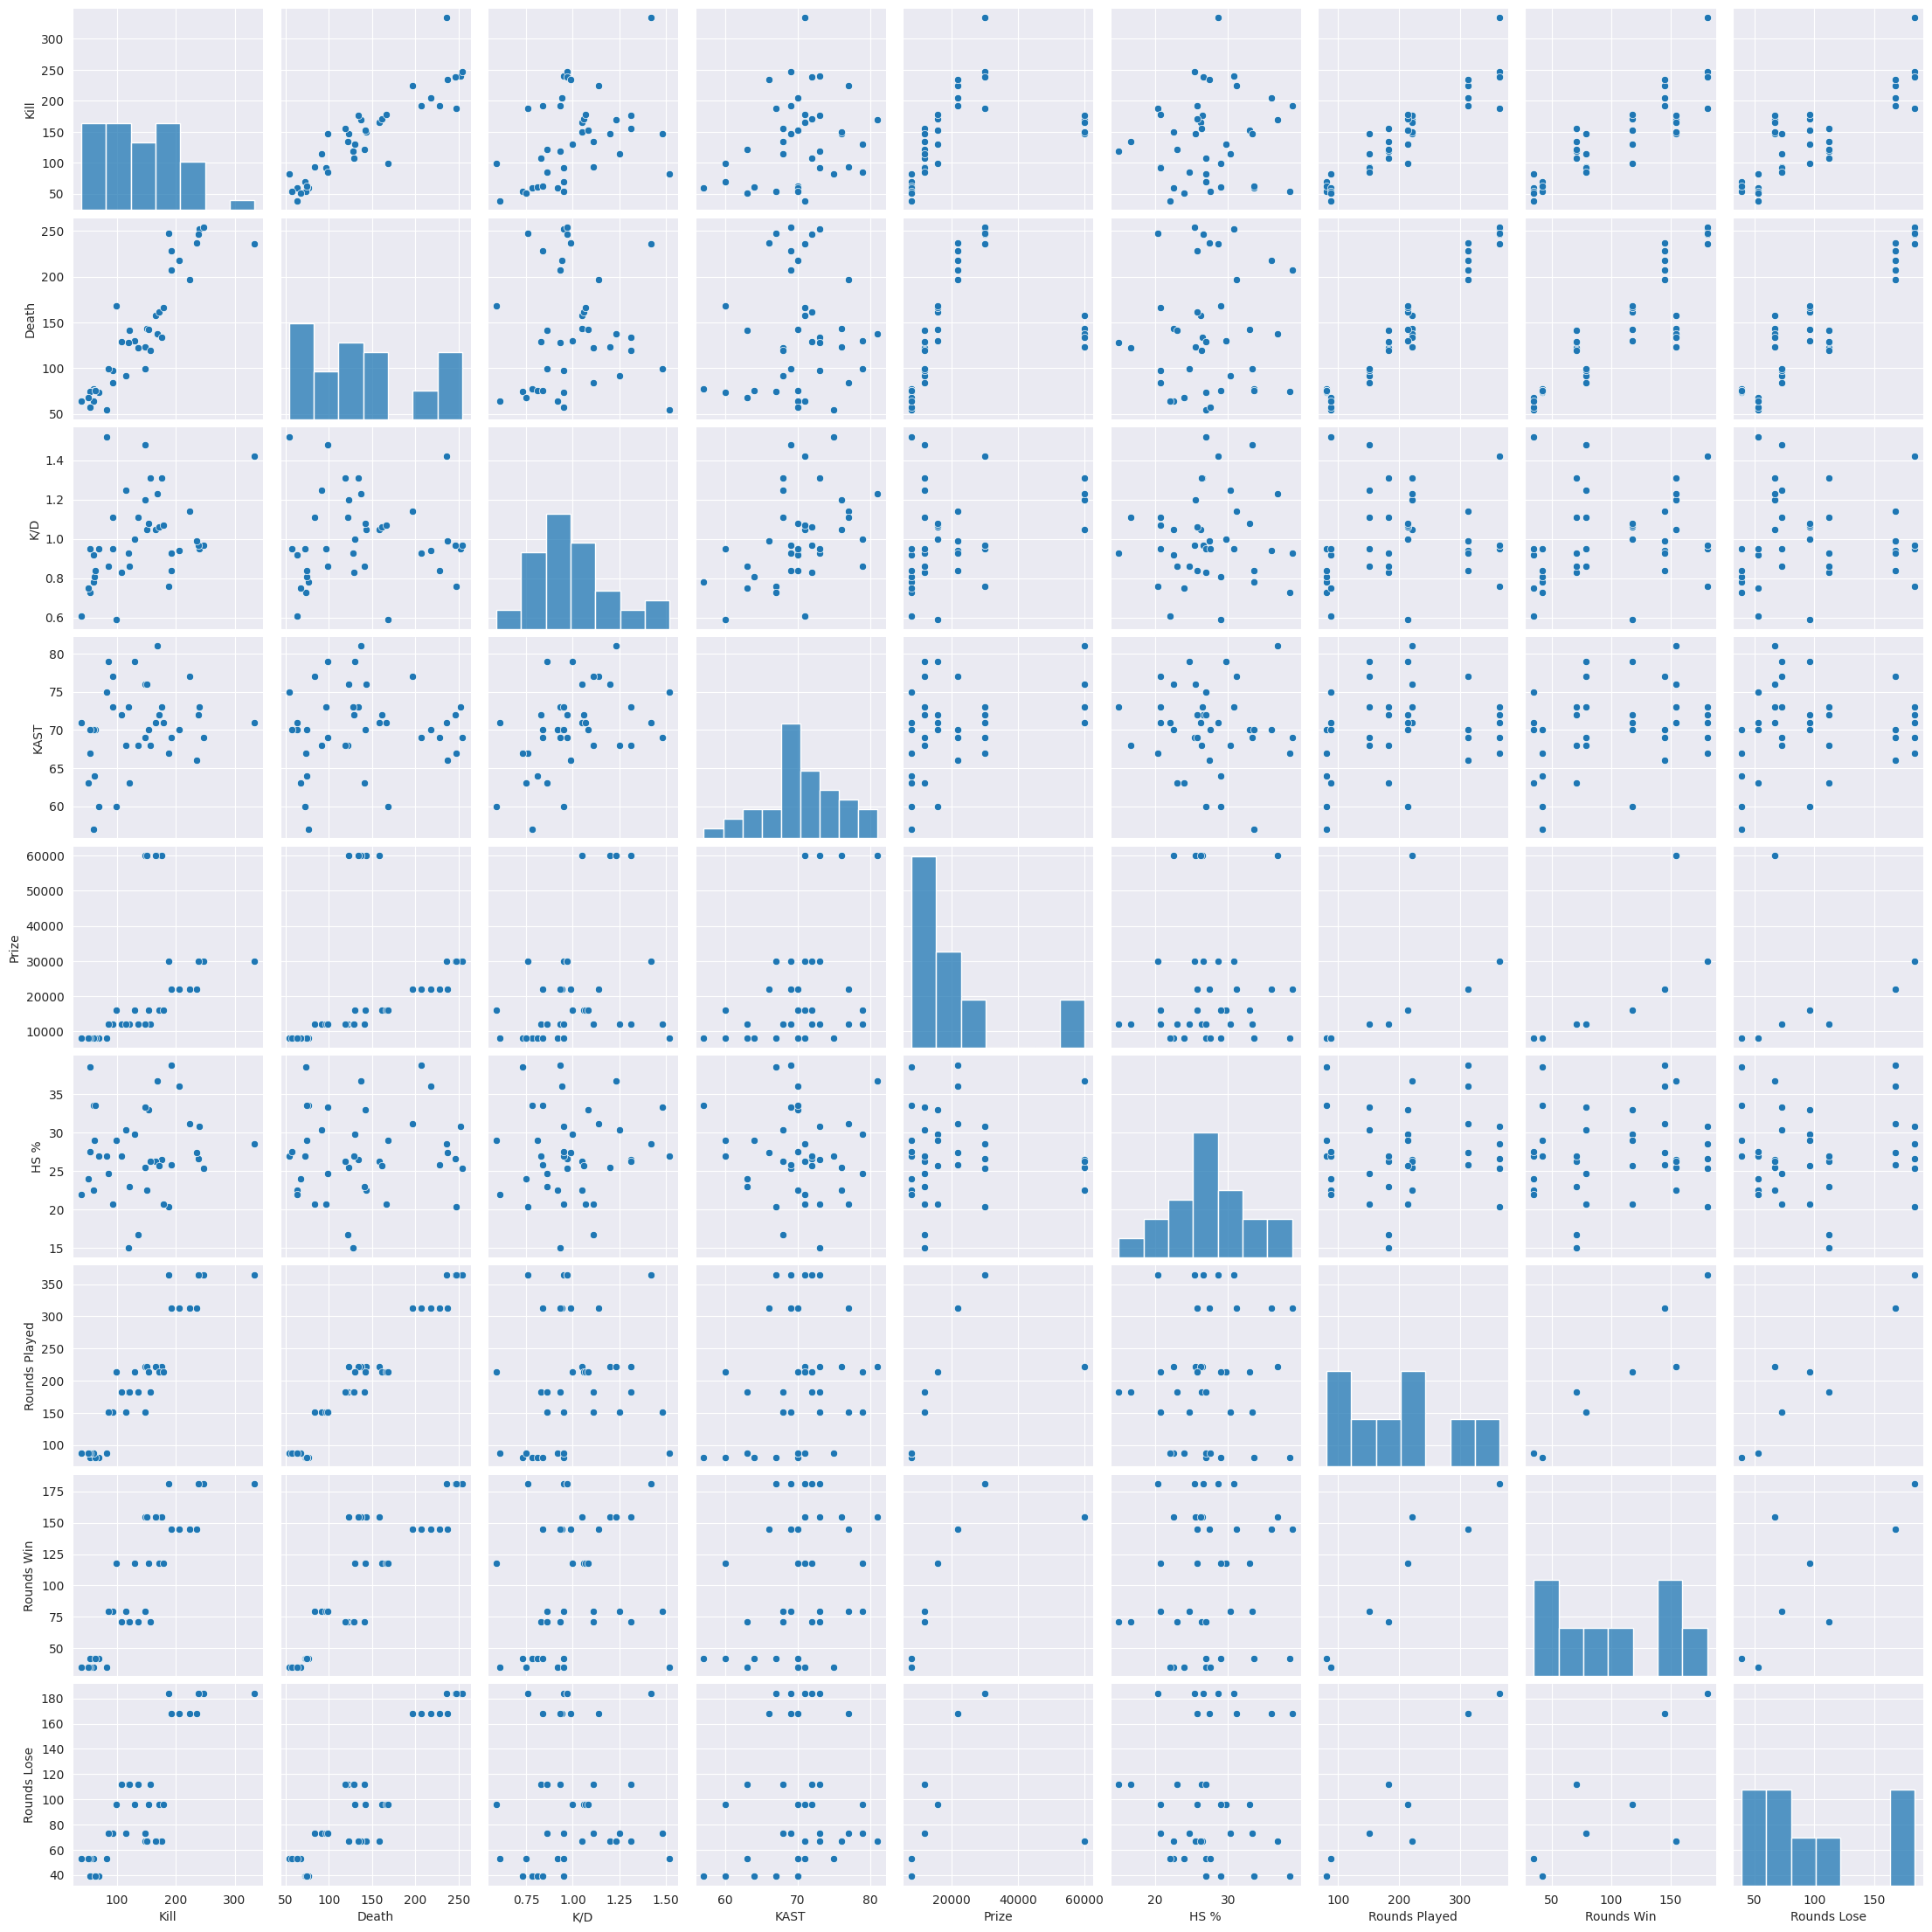

In [ ]:
# Para poder ter uma visão melhor de quais dados podem ser comparados para poder ter um gráfico de regressão de dados fiel
ax = sns.pairplot(dados)

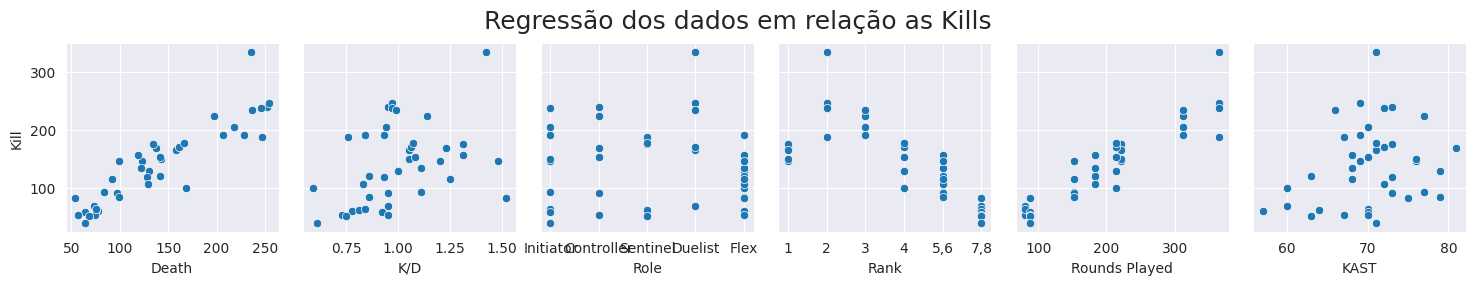

In [ ]:
"""
  Ao ver que ainda assim a kill é muito impactante nessa análise, realizo uma linha
de gráficos só para analisar as kills com todos as outras informações.

  Tem 3 que são bem claros de serem analisados pela regressão de dados: Death, Rank e Rounds Played.
"""
ax = sns.pairplot(dados, y_vars='Kill', x_vars=['Death', 'K/D', 'Role', 'Rank', 'Rounds Played', 'KAST'])

ax.fig.suptitle('Regressão dos dados em relação as Kills', fontsize = 18, y=1.10)
ax

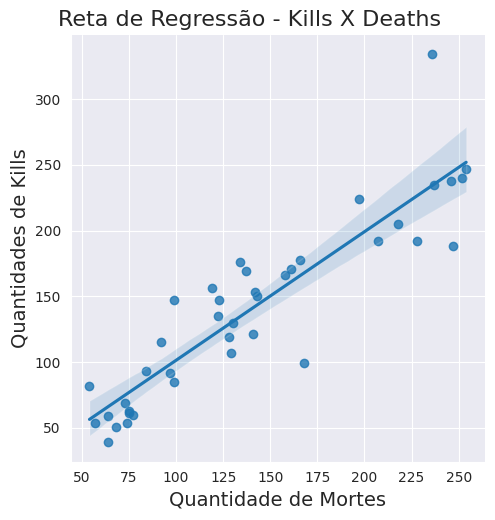

In [ ]:
"""
  Começando com Death, é possível perceber que quantos mais kills alguém tem,
mais esse jogador morre, indicando uma junção de 2 situações, a busca pela Kill gera
um risco maior de morte e quantos mais Rounds são jogados, maior o números de Abates
e Mortes consequentemente.
"""
ax= sns.lmplot(x="Death", y="Kill", data=dados)

ax.fig.suptitle('Reta de Regressão - Kills X Deaths', fontsize=16, y=1.02)
ax.set_xlabels("Quantidade de Mortes", fontsize=14)
ax.set_ylabels("Quantidades de Kills", fontsize=14)
ax

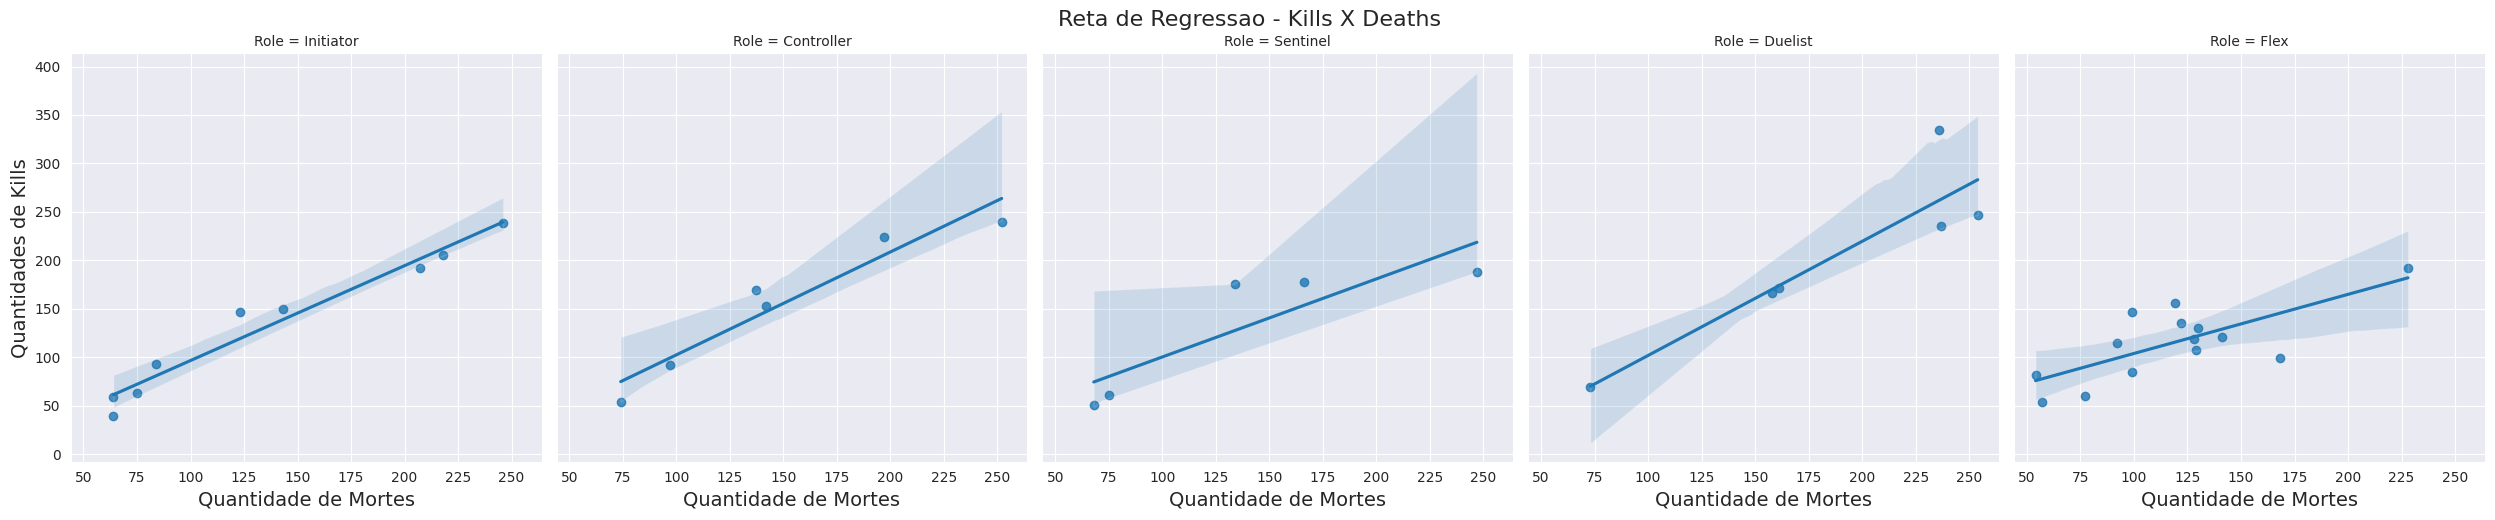

In [ ]:
"""
  Anteriormente, foi observado a alta taxa de abates que um duelista possui, por isso,
separei novamente entre funções para poder ver melhor quais funções tem mais riscos de
morrer e chances de matar.

  Em suma, parece que em todas as Roles tem uma alta chance de que quanto mais tendência
a ter abates, mais mortaliadade, principalmente os duelistas, onde a maioria tem mais
mortes do que kills. Podendo ser do fato de se arriscarem bastante, diferente dos outros, que tendem
a ter uma taxa de mortalidade moderada, com excessão dos players Flex, onde eles
possuem poucas mortes, mas também poucos abates, reforçando o papel deles de outras formas.
"""

ax= sns.lmplot(x="Death", y="Kill", data=dados, col='Role')

ax.fig.suptitle('Reta de Regressao - Kills X Deaths', fontsize=16, y=1.02)
ax.set_xlabels("Quantidade de Mortes", fontsize=14)
ax.set_ylabels("Quantidades de Kills", fontsize=14)
ax



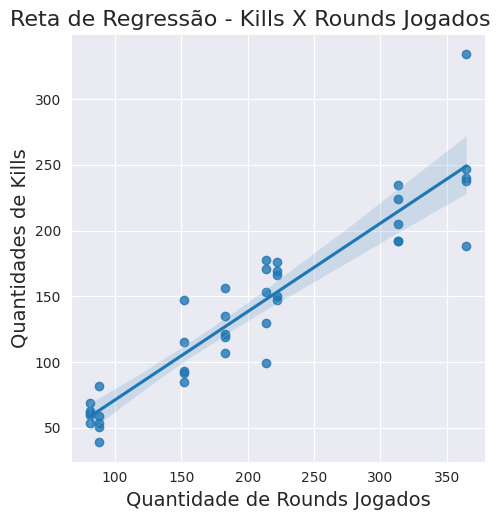

In [ ]:
"""
  Esse gráfico evidencia que quanto mais Rounds jogados, mais chances de se ter
boas performance por meio das kills.
"""
ax= sns.lmplot(x="Rounds Played", y="Kill", data=dados)

ax.fig.suptitle('Reta de Regressão - Kills X Rounds Jogados', fontsize=16, y=1.02)
ax.set_xlabels("Quantidade de Rounds Jogados", fontsize=14)
ax.set_ylabels("Quantidades de Kills", fontsize=14)
ax

In [ ]:
# Percebi somente agora que o Rank está em str e possui o separador de casas decimais pela vígula
dados.Rank = dados['Rank'].str.replace(',','.')
dados.Rank = dados['Rank'].astype(float)

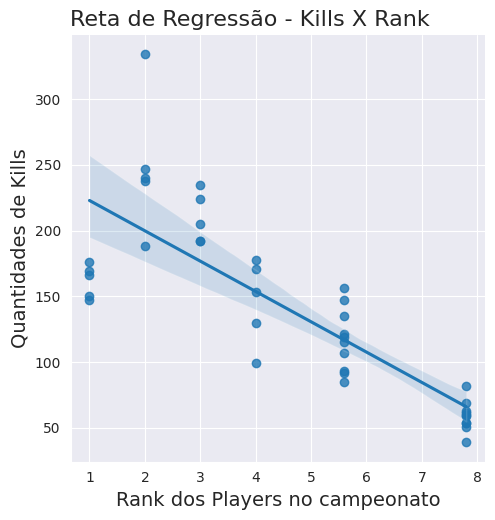

In [ ]:
"""
  Com a lógica de Rounds Jogados ser grande para obter um maior desempenho em kills,
esse gráfico evidencia ainda mais, já que os times eliminados de forma precoce tem bem menos
Rounds. Porém há uma certa discrepancia, pois o top 2 e top 3 tem uma clara diferença de kills
comparado com o time top 1. Por que será?
"""
ax= sns.lmplot(x="Rank", y="Kill", data=dados)

ax.fig.suptitle('Reta de Regressão - Kills X Rank', fontsize=16, y=1.02)
ax.set_xlabels("Rank dos Players no campeonato", fontsize=14)
ax.set_ylabels("Quantidades de Kills", fontsize=14)
ax

In [ ]:
dados_podio = dados.query('Rank == 1 or Rank == 2 or Rank == 3')

dados_podio

,Player,Team,Nationality,Kill,Death,K/D,KAST,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank
0,Sacy,LOUD,Brazil,147,123,1.20,76.0,60000.0,Initiator,25.50,222,155,67,1.0
1,saadhak,LOUD,Argentina,150,143,1.05,76.0,60000.0,Initiator,22.50,222,155,67,1.0
2,pANcada,LOUD,Brazil,169,137,1.23,81.0,60000.0,Controller,36.75,222,155,67,1.0
3,Less,LOUD,Brazil,176,134,1.31,73.0,60000.0,Sentinel,26.50,222,155,67,1.0
4,aspas,LOUD,Brazil,166,158,1.05,71.0,60000.0,Duelist,26.25,222,155,67,1.0
5,yay,OPTC,United States,334,236,1.42,71.0,30000.0,Duelist,28.60,365,181,184,2.0
6,Marved,OPTC,Canada,240,252,0.95,73.0,30000.0,Controller,30.80,365,181,184,2.0
7,Victor,OPTC,United States,247,254,0.97,69.0,30000.0,Duelist,25.40,365,181,184,2.0
8,crashies,OPTC,United States,238,246,0.97,72.0,30000.0,Initiator,26.60,365,181,184,2.0
9,FNS,OPTC,Canada,188,247,0.76,67.0,30000.0,Sentinel,20.40,365,181,184,2.0


Text(0.5, 1.0, 'Quantidade de Kills por Time')

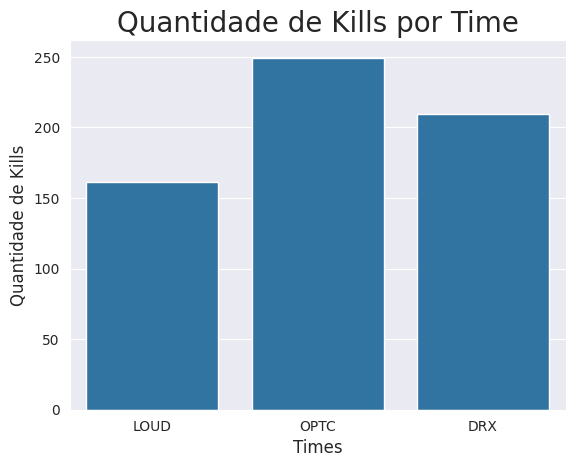

In [ ]:
ax = sns.barplot(data = dados_podio, y = 'Kill', x = 'Team', errorbar=None, )
ax.set_xlabel('Times', fontsize = 12)
ax.set_ylabel('Quantidade de Kills', fontsize = 12)
ax.set_title('Quantidade de Kills por Time', fontsize = 20)

Text(0.5, 1.0, 'Quantidade de Mortes por time')

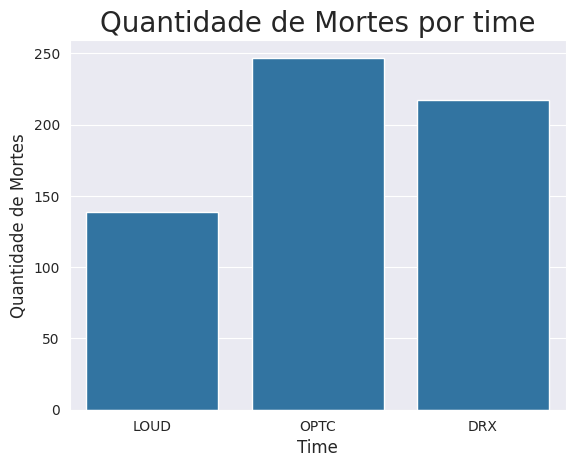

In [ ]:
ax = sns.barplot(data = dados_podio, y = 'Death', x = 'Team', errorbar=None, )
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('Quantidade de Mortes', fontsize = 12)
ax.set_title('Quantidade de Mortes por time', fontsize = 20)

Text(0.5, 1.0, 'Quantidade de Rounds Jogados por Time')

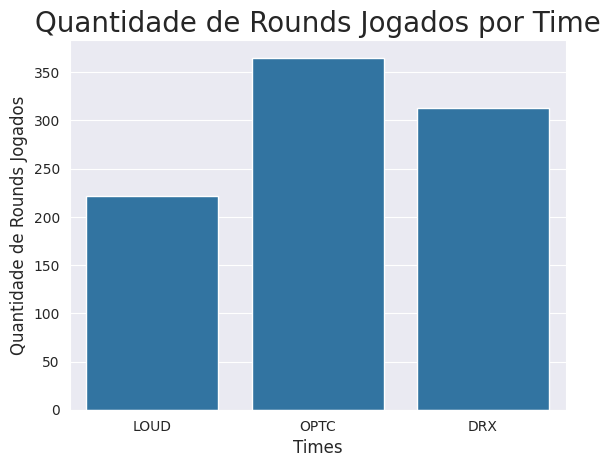

In [ ]:
ax = sns.barplot(data = dados_podio, y = 'Rounds Played', x = 'Team', errorbar=None, )
ax.set_xlabel('Times', fontsize = 12)
ax.set_ylabel('Quantidade de Rounds Jogados', fontsize = 12)
ax.set_title('Quantidade de Rounds Jogados por Time', fontsize = 20)

Text(0.5, 1.0, 'Quantidade de Rounds Perdidos por Time')

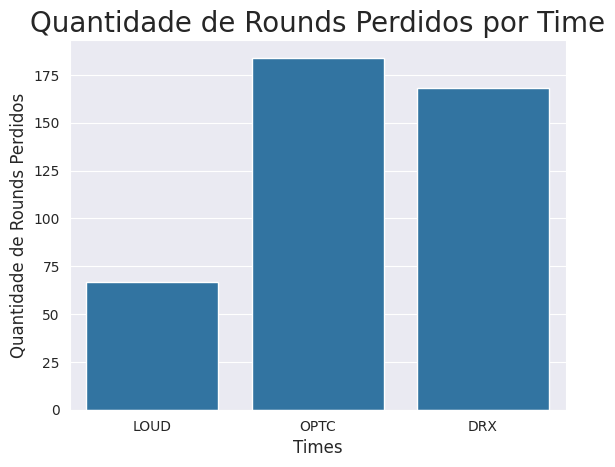

In [ ]:
ax = sns.barplot(data = dados_podio, y = 'Rounds Lose', x = 'Team', errorbar=None, )
ax.set_xlabel('Times', fontsize = 12)
ax.set_ylabel('Quantidade de Rounds Perdidos', fontsize = 12)
ax.set_title('Quantidade de Rounds Perdidos por Time', fontsize = 20)

Com uma análise bem superficial pegando quase todas as estatísticas dos times no TOP 3 do campeonato (LOUD, OPTIC e DRX), constatei que, como dito anteriormente, a quantidade de rounds jogado afeta diretamnete na quantidade de kills e morte. Portanto, depois de analisar os gráficos sobre Rounds Jogados e Rounds Perdidos, ficou claro que os times TOP 2 e TOP 3 tiveram mais kills porque tiveram mais oportunidades de jogar mais mapas e assim elevando o número de Rounds Jogados e assim as kills, e também deixando o número de mortes ficarem bem parelhos aos de kills.

A diferença para a LOUD é de certa forma gritante, pois a LOUD com mais de 100 rounds de diferença, teve BEM menos Rounds perdidos, uma quantidade mínima de mortes e uma taxa de Kill compatível com a quantidade de jogos.

Essa é aminha visão sobre essa diferença de Kills entre as equipes do Pódio, explicando um pouco a sobre eles terem mais kills no gráfico de regressão.

In [ ]:
# Realização de testes com 2 espaços amostrais (treino e teste)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# separendo a variavel dependente (y) das explicativas (X)
y = dados['Kill']
X = dados[['Death', 'Rounds Played', 'Rounds Win']]

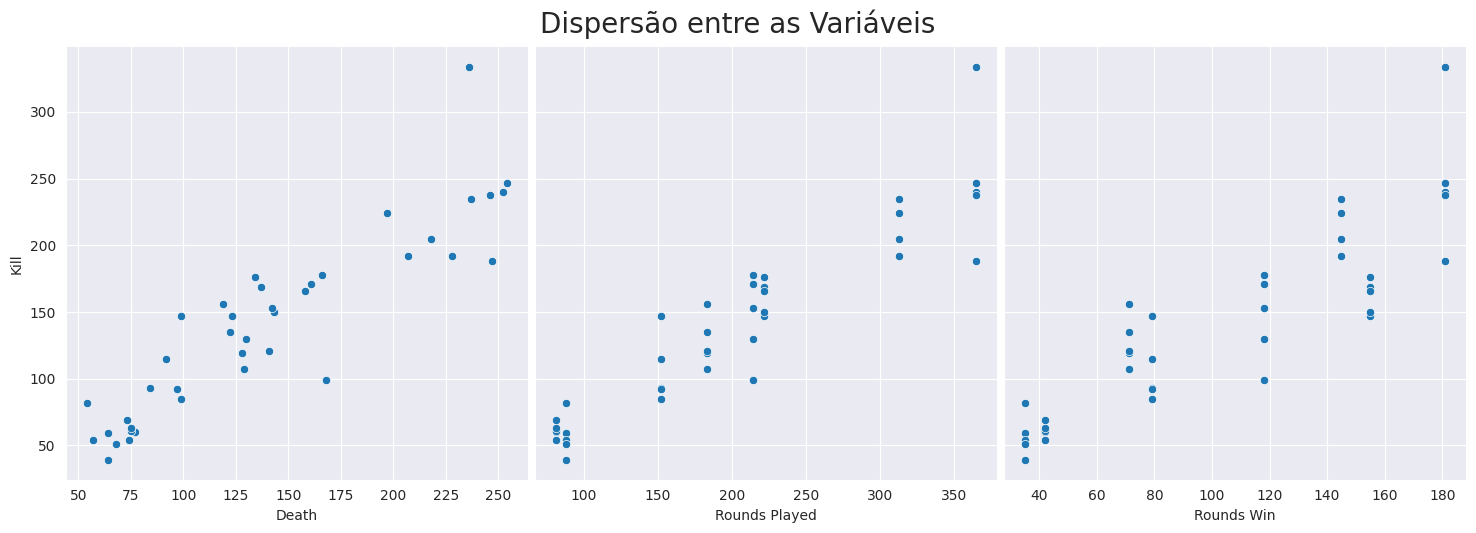

In [ ]:
ax = sns.pairplot(dados, y_vars='Kill', x_vars = ['Death', 'Rounds Played', 'Rounds Win'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [ ]:
# separando os espaços amostrais entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

print(X_train.shape, X_test.shape)

(28, 3) (12, 3)


In [ ]:
# estimar nosso modelo linear utilizando os dados de treino (y_train e X_train)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.86


Um número de certa forma bem alto, para um espaço amostral de somente 40 unidades

In [ ]:
# Gerando previsões para os dados de teste
y_previsto = modelo.predict(X_test)

In [ ]:
# Obtendo o R² para as previsões do nosso modelo (91%)
print('R² = %s' %metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.91


In [ ]:
# Fora o R², tem mais 2 estatísticas para a realização de testes formais, e elas aparentam ter ótimos valores
from sklearn import metrics

EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns = ['Métricas'])

,Métricas
EQM,377.19
REQM,19.42
R²,0.91


In [ ]:
# Mas para ter uma absoluta certeza da veracidade do modelo, farei uma teste formal
# Criando colunas para armazenar os resultados dos logarítimos para realizar um teste mais formal com a biblioteca statsmodels

dados['log_Kill'] = np.log(dados['Kill'])
dados['log_Death'] = np.log(dados['Death'])
dados['log_RoundsPlayed'] = np.log(dados['Rounds Played'] + 1)
dados['log_RoundsWin'] = np.log(dados['Rounds Win'] + 1)

In [ ]:
# Refazendo a assimilação das variaveis de treino e teste com os valores logaritmos
y = dados['log_Kill']

X = dados[['log_Death', 'log_RoundsPlayed', 'log_RoundsWin']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
import statsmodels.api as sm

# Gerando uma coluna constante para que seja possível realizar o teste adequadamente
X_train_com_const = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_const, hasconst = True).fit()

# Vizualizando as informções do modelo
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:               log_Kill   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     76.76
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           1.92e-12
Time:                        17:20:45   Log-Likelihood:                 11.807
No. Observations:                  28   AIC:                            -15.61
Df Residuals:                      24   BIC:                            -10.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1231      0.401  

De acordo com a análise dos valores de Prob(F) e P>|t|, constata-se que este modelo e as variaveis "log_RoundsWin" e "log_Death" não passaram no teste, ou seja, ele não são estatisticamente significativos.

### Continuação do modelo de Regressão

Por mais que o modelo deva ser discartado pela incorencia em 2 valores realizados nos testes, é possível realizar o teste de regressão e ver o porque dos testes dizerem que o modelo não é significativo.

In [ ]:
# Obtendo o intercepto do modelo (representa o efeito médio em  Y  (Kills) tendo todas as variáveis explicativas excluídas do modelo, sendo igualadas a 0)
modelo.intercept_

-0.1231164675244587

In [ ]:
# Obtendo os coeficientes de regressão
modelo.coef_

array([0.10319941, 0.76096545, 0.10469401])

In [ ]:
# Criando uma lista com os nomes das variáveis do modelo para depois criar um DF para armazenar os coeficientes do modelo
index = ['Intercepto', 'Mortes', 'Rounds Jogados', 'Rounds Vencidos']
pd.DataFrame(data = np.append(np.exp(modelo.intercept_), modelo.coef_), index = index, columns = ['Parâmetros'])

#### Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → O efeito médio nas Kills seria de <b>0.45 abates</b>,
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Deaths</b> → Mantendo-se os valores de Rounds Jogados e Rounds Jogados constantes, o acréscimo de 1 morte nas Deaths gera uma variação média nas kills de <b>-0.08 abates</b>,
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Rounds Jogados</b> → Mantendo-se os valores de Deaths e Rounds Ganhos constantes, o acréscimo de 1 Round Jogado gera uma variação média nas Kills de <b>0.65 abates</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Rounds Ganhos</b> → Mantendo-se os valores de Deaths e Rounds Ganhos constantes, o fato de o Round ter sido ganho gera uma variação média nas kills de <b>0.17 abates</b>.
</p>

In [ ]:
# Coletando um X de teste para fazer uma previsão pontual
entrada = X_test[0:1]
entrada

,log_Death,log_RoundsPlayed,log_RoundsWin
18,4.867534,5.370638,4.779123


In [ ]:
# Gerando uma previsão pontual, ela apresentou como resultado que o player selecionado teve 144 kills
np.exp(modelo.predict(entrada)[0]).round(2)

143.51

In [ ]:
# Porém, ele teve somente 130, tendo inflando seus abates em 14, um valor bem significativo
dados.query('index == 18')

,Player,Team,Nationality,Kill,Death,K/D,KAST,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank,log_Kill,log_Death,log_RoundsPlayed,log_RoundsWin
18,Shao,FPX,International,130,130,1.0,79.0,16000.0,Flex,29.75,214,118,96,4.0,4.867534,4.867534,5.370638,4.779123


In [ ]:
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='Quantidade de Kills - Previsão', ylabel='Quantidade de Kills - Real'>

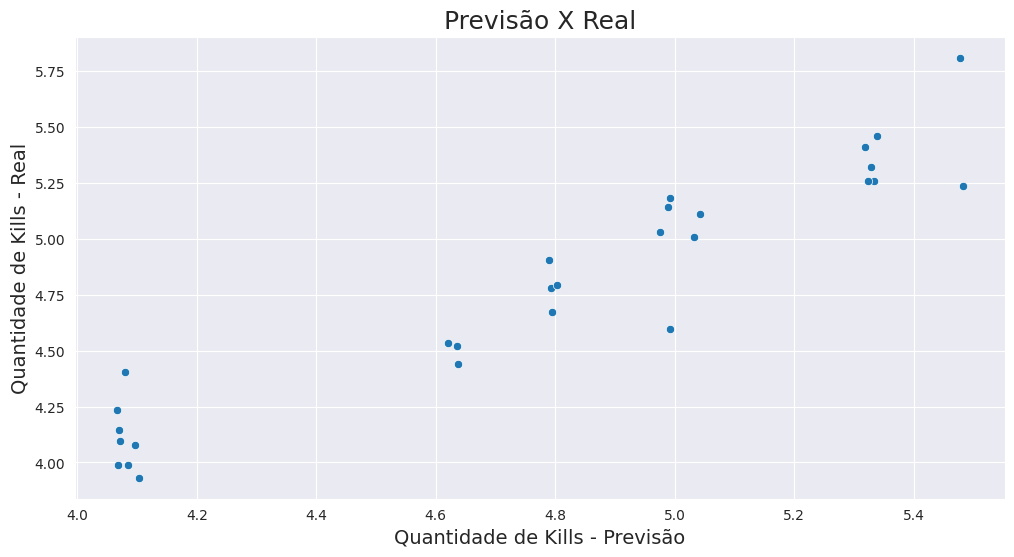

In [ ]:
# Gráfico de dispersão entre valor estimado e valor real
# Aparentemente, não houve sequer um acerto nas previsões, no máximo chegaram próximas
ax = sns.scatterplot(x=y_previsto_train, y= y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Quantidade de Kills - Previsão', fontsize=14)
ax.set_ylabel('Quantidade de Kills - Real', fontsize=14)
ax

In [ ]:
# Obtendo os resíduos
residuo = y_train - y_previsto_train

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Kills - Previsão', ylabel='Resíduos'>

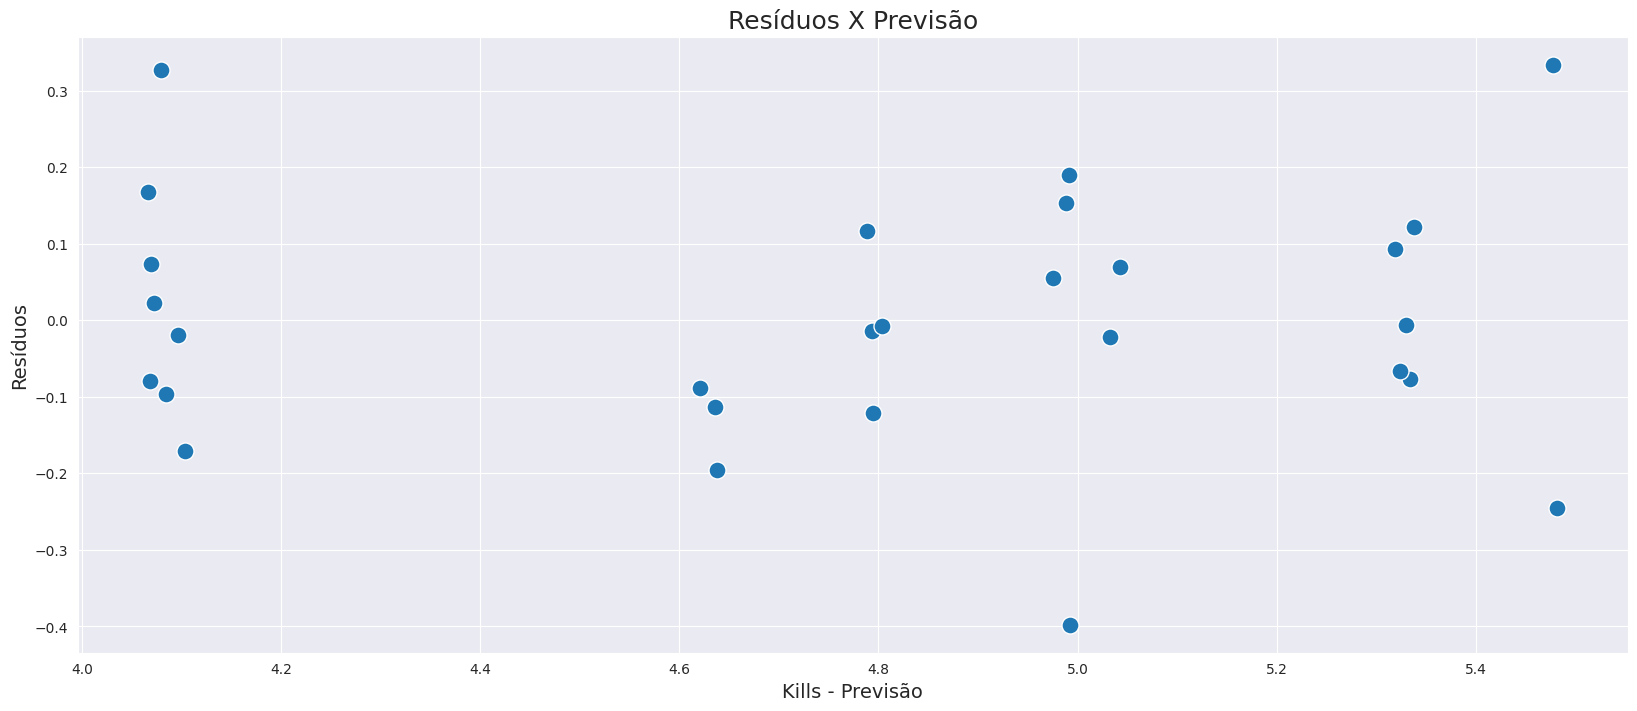

In [ ]:
# gerando um grafico de dispersão entre valor estimado e resíduos (é um método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade))
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s = 150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Kills - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Percebemos que o valor parece seguir um certo intervalo, porém quando as kills vão aumentando, o espaçamento entre elas aumentam, e consequentemente o intervalo aumenta.

<center><img src='https://raw.githubusercontent.com/RanierDC/DataScience/9bfce5c9872ba9ef7d1396b15182e9661e117a0d/var_u.jpg' width=70%></center>

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Kills - Previsão', ylabel='Resíduos²'>

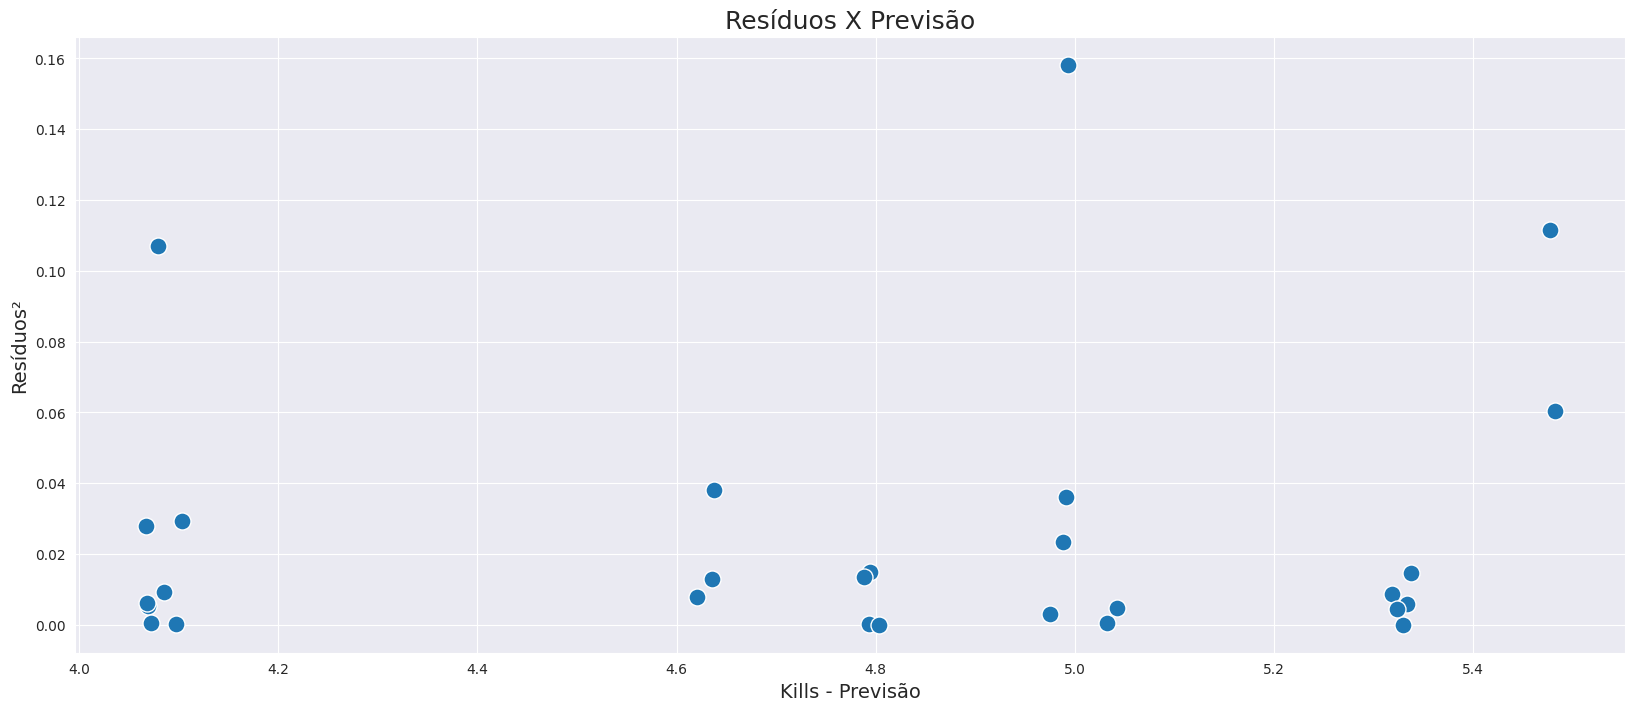

In [ ]:
# Utilizando os resíduos ao quadrado
# Se assemelha ao último gráfico da imagem acima, assim demonstrando uma heterocedasticidade nos dados, explicando possiveis erros no qual uma possivel previsão pode gerar
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s = 150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Kills - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax